# Cross-validation for Parameter tuning, model selection and feature selection

Reference: https://youtu.be/6dbrR-WymjI?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A

## Agenda

* What is the draw back of using the train/test split procedure for model evaluation?

* How does K-fold cross validation overcome this limitation?

* How can cross-validation be used for selecting **tuning parameters**, Choosing between **models** and selecting **feature**?

* What are some possible improvements to cross-validation?

## Review of Model Evaluation procedures

**Motivation:** Need a way to choose between machine learning models 

* Goal is to estimate likely performance of a model on out-of-sample data

**Initial idea:** Train & Test on the same data

* But, Maximizing training accuracy rewards over complex model which overfit the training data

**Alternative Idea:** Train/test Split

* Split the dataset into two pieces, so that the model can be trained and tested on **different data**
* **Testing accuracy**(does not reward over complex model) is a better estimate than training accuracy of out-of-sample performance
* But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

In [1]:
# Import all the necessary classes, function and modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# read the iris dataset
iris= load_iris()

#feature Matrix
x = iris.data

#response vector
y = iris.target

In [2]:
#split the data into train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=4)

#check the classification accuracy for K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

print(metrics.accuracy_score(ytest,ypred))

0.973684210526


**Question:** What if we creatted bunch of train/splits, calculated the testing accuracy for each and averaged the result together?

**Answer:** That's the sense of cross validation!

### Steps for K-fold Cross-validation

1. Split the dataset into K **equal** partitions(or "folds")
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate the testing accuracy.
4. Repeat step 2 and 3 k times. using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy

Daigram of 5 fold Cross validation:

![alt text](07_cross_validation_diagram.png "Title")

### Cross Validate Example: Parameter tuning

In [3]:
# Import Cross_val_score function from Model_selection (Cross_validate)

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)

#CV represents no of k-folds 10 is the proven number to take minimum of folds
scores = cross_val_score(knn,x,y,scoring="accuracy",cv=10)

print(scores)
print("avergae Score of all 10 fold test: ",scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
avergae Score of all 10 fold test:  0.966666666667


In [4]:
#define Knn range from 1 to 31
knn_range=range(1,31)
knn_accuracy=[]
for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_accuracy.append(cross_val_score(knn,x,y,scoring="accuracy",cv=10).mean())

print(knn_accuracy)


[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


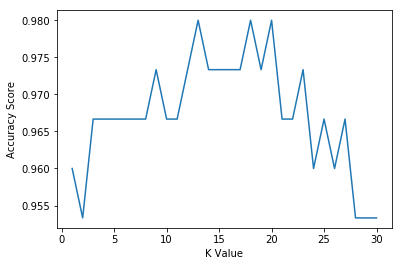

In [5]:

from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(knn_range,knn_accuracy)
plt.xlabel("K Value")
plt.ylabel("Accuracy Score")

* From above graph we see that best k value is around 13 to 20
* Since higher value of K has less complexity we can choose K=20

### Cross validation Example: Model selection

In [6]:
#instantiate the KNN Model with Best K value
knn = KNeighborsClassifier(n_neighbors=20)

# instantiate Logistic Regression Model
logreg = LogisticRegression()


knn_score = cross_val_score(knn,x,y,cv=10,scoring="accuracy").mean()
logreg_score = cross_val_score(logreg,x,y,cv=10,scoring="accuracy").mean()

print("KNN accuracy %f and Logistic Regresion Accuracy:%f"%(knn_score,logreg_score))

KNN accuracy 0.980000 and Logistic Regresion Accuracy:0.953333


### Cross Validation Example:  Feature selection

In [7]:
#import the Pandas library

import pandas as pd

data_adv = pd.read_csv("Advertising.csv",index_col=0)

In [8]:
data_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
#import LinearRegression Model

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [10]:
from math import factorial as f
from numpy import random


def nCr(n,r):
    return f(n)//(f(n-r)*f(r))

def combination_matrix(features):
    a=[]
    n = len(features)
    for i in range(1,n+1):
        a.append(nCr(n,i))
    return a

a = combination_matrix(data_adv.columns.values[:-1])

def feature_selection(features,n):
    dict_feature={}
    for feature_size in range(1,n+1):
        dict_feature[feature_size]=[]
        while True:            
            ch = random.choice(features,feature_size)
            ch1 = list(set(ch))
            if len(ch) == len(ch1):
                if ch1 not in dict_feature[feature_size]:
                    dict_feature[feature_size].append(ch1)
                    
            if a[feature_size-1] == len(dict_feature[feature_size]):
                break
    return(dict_feature)


In [11]:

print(a)
dict_feature = feature_selection(data_adv.columns.values[:-1],3)


print(dict_feature)

[3, 3, 1]
{1: [['Newspaper'], ['TV'], ['Radio']], 2: [['TV', 'Radio'], ['Newspaper', 'TV'], ['Newspaper', 'Radio']], 3: [['Newspaper', 'TV', 'Radio']]}


In [12]:

def sample_out_data(feature_size,n):
    features = dict_feature[feature_size][n]
    x=data_adv[features]
    y=data_adv[data_adv.columns.values[-1]]
    xtr,xte,ytr,yte = train_test_split(x,y,random_state=12)
    return(xtr,xte,ytr,yte)

In [22]:
from math import sqrt
import numpy as np

features = data_adv.columns.values[:-1]
results = {}
feature_selection(features,len(features))
results['No of Features']=[]
results['CV_RMSE']=[]
results['features_used']=[]
for feature_size in range(1,len(features)+1):
    for n in range(len(dict_feature[feature_size])):
        xtr,xte,ytr,yte=sample_out_data(feature_size,n)
        linreg.fit(xtr,ytr)
        ypred=linreg.predict(xte)
        results['No of Features'].append(feature_size)
        results['features_used'].append(dict_feature[feature_size][n])        
        results['CV_RMSE'].append(sqrt(metrics.mean_squared_error(yte,ypred)))

res = pd.DataFrame(results)

print(res)


res[res.CV_RMSE == res.CV_RMSE.min()]

    CV_RMSE  No of Features           features_used
0  5.181512               1             [Newspaper]
1  3.001302               1                    [TV]
2  4.584287               1                 [Radio]
3  1.643662               2             [TV, Radio]
4  2.845718               2         [Newspaper, TV]
5  4.605631               2      [Newspaper, Radio]
6  1.650748               3  [Newspaper, TV, Radio]


,CV_RMSE,No of Features,features_used
3,1.643662,2,"[TV, Radio]"


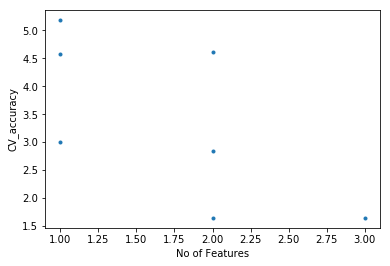

In [14]:
plt.plot(res['No of Features'],res['CV_accuracy'],'.')
plt.xlabel("No of Features")
plt.ylabel("CV_accuracy")


### Cross validation Feature selection using cross_val_score function

In [15]:
features = data_adv.columns.values[:-1]

linreg =  LinearRegression()
x = data_adv[features]
y = data_adv['Sales']

score = cross_val_score(linreg,x,y,cv=10,scoring='neg_mean_squared_error')

print(np.sqrt(-score).mean())

1.69135317081


#### remove News paper feature

In [16]:
features = data_adv.columns.values[:-2]

linreg =  LinearRegression()
x = data_adv[features]
y = data_adv['Sales']

score = cross_val_score(linreg,x,y,cv=10,scoring='neg_mean_squared_error')

print(np.sqrt(-score).mean())

1.67967484191


### Cross val with all the feature and choose better feature

In [25]:
from math import sqrt
import numpy as np

act_features = data_adv.columns.values[:-1]

def sample_out_data_cv(feature_size,n):
    features = dict_feature[feature_size][n]
    x=data_adv[features]
    y=data_adv[data_adv.columns.values[-1]]
    return(x,y)

results = {}
feature_selection(act_features,len(act_features))
results['No of Features']=[]
results['CV_RMSE']=[]
results['features_used']=[]


for feature_size in range(1,len(act_features)+1):
    for n in range(len(dict_feature[feature_size])):
        x,y=sample_out_data_cv(feature_size,n)
        results['No of Features'].append(feature_size)
        results['features_used'].append(dict_feature[feature_size][n])        
        results['CV_RMSE'].append(np.sqrt((-cross_val_score(linreg,x,y,cv=10,scoring='neg_mean_squared_error')).mean()))

res1 = pd.DataFrame(results)

print(res1)

res1[res1.CV_RMSE == res1.CV_RMSE.min()]

    CV_RMSE  No of Features           features_used
0  5.106098               1             [Newspaper]
1  3.283674               1                    [TV]
2  4.320405               1                 [Radio]
3  1.736064               2             [TV, Radio]
4  3.145083               2         [Newspaper, TV]
5  4.364321               2      [Newspaper, Radio]
6  1.749276               3  [Newspaper, TV, Radio]


,CV_RMSE,No of Features,features_used
3,1.736064,2,"[TV, Radio]"


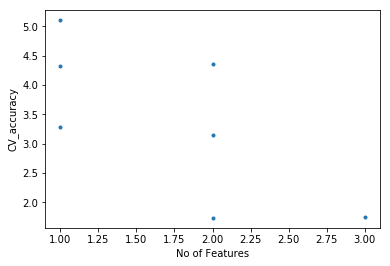

In [23]:
plt.plot(res1['No of Features'],res1['CV_RMSE'],'.')
plt.xlabel("No of Features")
plt.ylabel("CV_accuracy")
